# Global Warming Analysis 


<br />
<center>
<img src="ipynb.images/earth.jpeg" width=600 height= 400 />
</center>


## Team Futurists: 
<div style="text-align: left"> </div>
<div style="text-align: left; margin-top:10px">Prudhvi Chandra Sekharamahanti</div>
<div style="text-align: left">Shalini Chandra</div>
<div style="text-align: left">Shijun Cao</div>

## Objective: 

The main objective of this data science project is to extract data related to ***Emissions, Ice Cover, Forest Cover, Endangered species(Penguins)*** and perform cleaning and use it for prediction of future temperatures of earth. Below are the aspects covered as part of the project:
1. How emissions data is related to Air temperatures and how it is useful in predicting the future temperatures.
2. Predicting the future temperatures of Antarctica based on Ice Mass Cover
3. Predicting the temperatures based on forest cover.
4. How Ice mass is related ot ***Gentoo Penguin Populations***

<br />
<center>
<img src="ipynb.images/flow.jpg" width=600 height= 800 />
</center>

## Data Souces

***Climate data - Mesonet API ( temperatures data ):***     
https://atmos.uw.edu/blog/jzagrod/2018/08/10/how-to-use-pandas-to-download-and-plot-weather-data-from-the-mesonet-api/     

***Emissions Data(N20, Infrared, solar, UV):***       
https://www.esrl.noaa.gov/gmd/dv/data/           

***Global Forest Watch:***      
https://rainforests.mongabay.com/amazon/deforestation-rate.html           

***The Antarctic Iceberg Tracking Dataset:***     
https://climate.nasa.gov/vital-signs/ice-sheets/        

***Gentoo Penguin population Dataset:***          
http://www.penguinmap.com/mapppd

## Algorithms:

1. Long-Short term memory Neural Networks
2. Aritficial Neural Networks in keras
3. Auroregressive Moving Average

In [2]:
import urllib
import json
import pandas as pd
import matplotlib.pyplot as plt

## Data Extraction and Cleaning

***Emissions data***

In [2]:
import pandas as pd

rad=pd.read_csv('C:/Users/prudh/Desktop/Data Science Eng Methods and Tools/Final_Project/data_sources/radiation/radiation.csv')

In [3]:
rad.head(10)

,Date,Downwelling global solar,Upwelling solar,Direct solar,PAR,UVB,Diffuse solar,Downwelling infrared,Upwelling infrared,Air temperature,...,Relative humidity,Station pressure,Net solar,Net infrared,Total net radiation,Conversion factor,Transmission,Albedo,Specific humidity,Virtual temperature
0,2010-01,113.19,22.51,171.46,48.36,10.24,45.69,271.90,346.41,7.43,...,50.59,903.54,90.69,-74.51,16.17,0.436,0.564,0.196,3.450,8.017
1,2010-02,160.52,31.54,216.36,68.68,16.83,52.95,280.56,360.59,8.83,...,55.79,901.98,128.98,-80.02,48.94,0.436,0.613,0.194,4.200,9.541
2,2010-03,228.24,45.68,268.88,96.17,29.48,73.90,271.79,382.27,11.67,...,34.66,902.74,182.56,-110.49,72.07,0.423,0.682,0.199,3.037,12.182
3,2010-04,289.19,58.70,320.56,125.43,43.18,82.50,285.58,408.13,14.50,...,30.60,898.44,230.53,-122.55,107.96,0.437,0.695,0.203,3.196,15.049
4,2010-05,337.68,68.51,404.24,146.49,56.52,66.08,298.21,439.41,18.38,...,22.60,898.62,269.20,-141.20,128.01,0.436,0.727,0.203,3.148,18.928
5,2010-06,361.02,74.20,436.70,157.70,69.21,60.95,342.23,495.04,27.64,...,17.36,897.47,286.83,-152.82,134.02,0.437,0.745,0.206,4.355,28.401
6,2010-07,339.62,70.09,399.97,149.37,68.43,67.21,375.83,524.21,32.51,...,14.82,897.43,269.54,-148.16,121.69,0.442,0.718,0.206,5.288,33.447
7,2010-08,330.57,67.38,438.29,144.52,60.29,45.02,-9999.90,-9999.90,-9999.90,...,-9999.90,897.86,262.41,-9999.90,-9999.90,0.437,0.756,0.204,-9999.900,-9999.900
8,2010-09,276.75,59.72,408.54,119.05,46.55,36.85,324.11,473.62,26.35,...,14.06,899.17,217.03,-148.05,71.30,0.430,0.760,0.216,3.283,26.924
9,2010-10,176.19,36.31,233.63,78.14,25.60,56.20,319.78,417.23,18.38,...,39.87,903.80,139.91,-97.43,42.50,0.450,0.621,0.203,5.595,19.352


***Copying original dataframe and making 'Date' column as index***

In [4]:
final_rad= rad.copy()
final_rad.set_index('Date',inplace=True)
final_rad.head(10)

,Downwelling global solar,Upwelling solar,Direct solar,PAR,UVB,Diffuse solar,Downwelling infrared,Upwelling infrared,Air temperature,Wind,Relative humidity,Station pressure,Net solar,Net infrared,Total net radiation,Conversion factor,Transmission,Albedo,Specific humidity,Virtual temperature
Date,,,,,,,,,,,,,,,,,,,,
2010-01,113.19,22.51,171.46,48.36,10.24,45.69,271.90,346.41,7.43,3.40,50.59,903.54,90.69,-74.51,16.17,0.436,0.564,0.196,3.450,8.017
2010-02,160.52,31.54,216.36,68.68,16.83,52.95,280.56,360.59,8.83,2.86,55.79,901.98,128.98,-80.02,48.94,0.436,0.613,0.194,4.200,9.541
2010-03,228.24,45.68,268.88,96.17,29.48,73.90,271.79,382.27,11.67,4.32,34.66,902.74,182.56,-110.49,72.07,0.423,0.682,0.199,3.037,12.182
2010-04,289.19,58.70,320.56,125.43,43.18,82.50,285.58,408.13,14.50,4.94,30.60,898.44,230.53,-122.55,107.96,0.437,0.695,0.203,3.196,15.049
2010-05,337.68,68.51,404.24,146.49,56.52,66.08,298.21,439.41,18.38,5.27,22.60,898.62,269.20,-141.20,128.01,0.436,0.727,0.203,3.148,18.928
2010-06,361.02,74.20,436.70,157.70,69.21,60.95,342.23,495.04,27.64,4.86,17.36,897.47,286.83,-152.82,134.02,0.437,0.745,0.206,4.355,28.401
2010-07,339.62,70.09,399.97,149.37,68.43,67.21,375.83,524.21,32.51,4.15,14.82,897.43,269.54,-148.16,121.69,0.442,0.718,0.206,5.288,33.447
2010-08,330.57,67.38,438.29,144.52,60.29,45.02,-9999.90,-9999.90,-9999.90,4.97,-9999.90,897.86,262.41,-9999.90,-9999.90,0.437,0.756,0.204,-9999.900,-9999.900
2010-09,276.75,59.72,408.54,119.05,46.55,36.85,324.11,473.62,26.35,3.47,14.06,899.17,217.03,-148.05,71.30,0.430,0.760,0.216,3.283,26.924


***Dropping unwanted columns from the data set***

In [5]:
cols=['Downwelling global solar','Upwelling solar','PAR','Diffuse solar','Downwelling infrared','Wind','Relative humidity','Station pressure','Net solar','Net infrared','Total net radiation','Conversion factor','Transmission','Albedo','Specific humidity','Virtual temperature']
final_rad=final_rad.drop(cols,axis=1)
final_rad.head(5)

,Direct solar,UVB,Upwelling infrared,Air temperature
Date,,,,
2010-01,171.46,10.24,346.41,7.43
2010-02,216.36,16.83,360.59,8.83
2010-03,268.88,29.48,382.27,11.67
2010-04,320.56,43.18,408.13,14.50
2010-05,404.24,56.52,439.41,18.38


***Renaming the columns of a dataframe***

In [6]:
final_rad=final_rad.rename(columns={'Direct solar':'Solar Radiation','UVB':'UV radiation','Upwelling infrared':'Highest Infrared radiation'})
final_rad.head(5)

,Solar Radiation,UV radiation,Highest Infrared radiation,Air temperature
Date,,,,
2010-01,171.46,10.24,346.41,7.43
2010-02,216.36,16.83,360.59,8.83
2010-03,268.88,29.48,382.27,11.67
2010-04,320.56,43.18,408.13,14.50
2010-05,404.24,56.52,439.41,18.38


***Replacing junk values(-9999.90) with zeros***

In [7]:
final_rad['Solar Radiation']=final_rad['Solar Radiation'].replace(-9999.90,0)
#final_rad['UV radiation']=final_rad['UV radiation'].replace(-9999.90,0)
final_rad['Highest Infrared radiation']=final_rad['Highest Infrared radiation'].replace(-9999.90,0)
final_rad['Air temperature']=final_rad['Air temperature'].replace(-9999.90,0)

***Replacing all zeros with previous non-zero value***

In [8]:
final_rad['Solar Radiation']=final_rad['Solar Radiation'].mask(final_rad['Solar Radiation'] == 0).ffill(downcast='infer')
final_rad['Highest Infrared radiation']=final_rad['Highest Infrared radiation'].mask(final_rad['Highest Infrared radiation'] == 0).ffill(downcast='infer')
final_rad['Air temperature']=final_rad['Air temperature'].mask(final_rad['Air temperature'] == 0).ffill(downcast='infer')

###  Final Data frame after Data Cleaning

In [9]:
final_rad.head(5)

,Solar Radiation,UV radiation,Highest Infrared radiation,Air temperature
Date,,,,
2010-01,171.46,10.24,346.41,7.43
2010-02,216.36,16.83,360.59,8.83
2010-03,268.88,29.48,382.27,11.67
2010-04,320.56,43.18,408.13,14.50
2010-05,404.24,56.52,439.41,18.38


***Iceberg Data***

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
iceberg_data = pd.read_csv('C:/Users/prudh/Desktop/Data Science Eng Methods and Tools/Final_Project/data_sources/Antarctic mass.csv',index_col=['Date'])

In [12]:
iceberg_data.head(5)

,Antarctic mass(Gigatonnes),Antarctic mass 1-sigma uncertainty
Date,,
2010-01,-803.23,33.03
2010-02,-807.45,32.76
2010-03,-688.18,34.51
2010-04,-759.94,32.20
2010-05,-780.91,32.63


***Forest Cover Data***

In [13]:
forest_data = pd.read_csv('C:/Users/prudh/Desktop/Data Science Eng Methods and Tools/Final_Project/data_sources/MonthlyForestCover.csv',index_col=['Date'])

In [14]:
forest_data.head(5)

,DETER,DETER TTM,SAD,SAD TTM
Date,,,,
2010-01,23,2905,63,1915
2010-02,185,2947,88,1941
2010-03,52,2981,76,1960
2010-04,52,2996,65,1904
2010-05,110,2982,96,1843


***Nitrous Oxide Emissions Data***

In [15]:
n2o=pd.read_csv('C:/Users/prudh/Desktop/Data Science Eng Methods and Tools/Final_Project/data_sources/N20/N2O.csv',index_col=['Date'])

In [16]:
n2o.tail(5)

,N2O level
Date,
2019-08,331.72
2019-09,331.84
2019-10,332.03
2019-11,332.38
2019-12,332.55


In [17]:
n2o_level=n2o.fillna(0)
mean=n2o_level.mean()
n2o_level=n2o_level.replace(0,mean)

## Data Integration and Saving as CSV file

In [18]:
climate_data=pd.concat([final_rad,n2o,iceberg_data,forest_data],axis=1)

In [19]:
#climate_data=climate_data.drop(climate_data.tail(3).index)

In [20]:
climate_data.to_csv('C:/Users/prudh/Desktop/Data Science Eng Methods and Tools/Final_Project/data_sources/climate_data.csv')

### Now starts the prediction analytics on the final data
***Steps folowed:***
1. Drop the dependant variable column(Air temperature)
2. Run RNN-LSTTM on the independant features we have on data from 2001-2018
3. Test the values with 2019 data
4. Once we reach model accuracy greater than 95% we then have to extrapolate the index into the future i.e.2020
5. Now we have independant feature values(emission values) for the future(2020)
6. Finally we predict the Air Temperature of the futrue using these values

In [21]:
climate_data2=climate_data.drop(columns=['Air temperature'],axis=1)
len(climate_data2)

120

In [22]:
climate_data2=climate_data2.dropna()
climate_data2.tail(5)

,Solar Radiation,UV radiation,Highest Infrared radiation,N2O level,Antarctic mass(Gigatonnes),Antarctic mass 1-sigma uncertainty,DETER,DETER TTM,SAD,SAD TTM
Date,,,,,,,,,,
2019-08,411.59,61.49,531.08,331.72,-2228.62,31.57,1695,7706,886,5398
2019-09,342.24,42.89,482.35,331.84,-2100.59,32.60,1443,8427,802,5756
2019-10,367.58,27.95,413.16,332.03,-2281.08,33.45,555,8491,583,6152
2019-11,256.04,15.22,374.80,332.38,-2341.65,39.41,523,8749,342,6219
2019-12,161.34,8.71,338.70,332.55,-2387.01,46.54,187,8870,227,6200


In [28]:
climate_data.head()

,Solar Radiation,UV radiation,Highest Infrared radiation,Air temperature,N2O level,Antarctic mass(Gigatonnes),Antarctic mass 1-sigma uncertainty,DETER,DETER TTM,SAD,SAD TTM
Date,,,,,,,,,,,
2010-01,171.46,10.24,346.41,7.43,323.70,-803.23,33.03,23,2905,63,1915
2010-02,216.36,16.83,360.59,8.83,323.85,-807.45,32.76,185,2947,88,1941
2010-03,268.88,29.48,382.27,11.67,323.94,-688.18,34.51,52,2981,76,1960
2010-04,320.56,43.18,408.13,14.50,324.08,-759.94,32.20,52,2996,65,1904
2010-05,404.24,56.52,439.41,18.38,323.85,-780.91,32.63,110,2982,96,1843


## Data Visualization

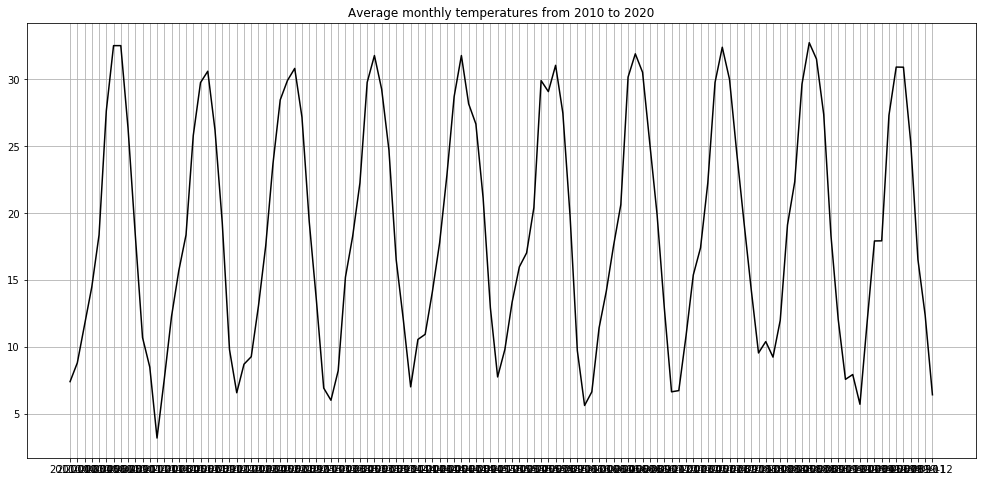

In [38]:
plt.figure(figsize=(17, 8))
plt.plot(climate_data.index,climate_data['Air temperature'],color='black')
plt.title('Average monthly temperatures from 2010 to 2020')
plt.grid(True)


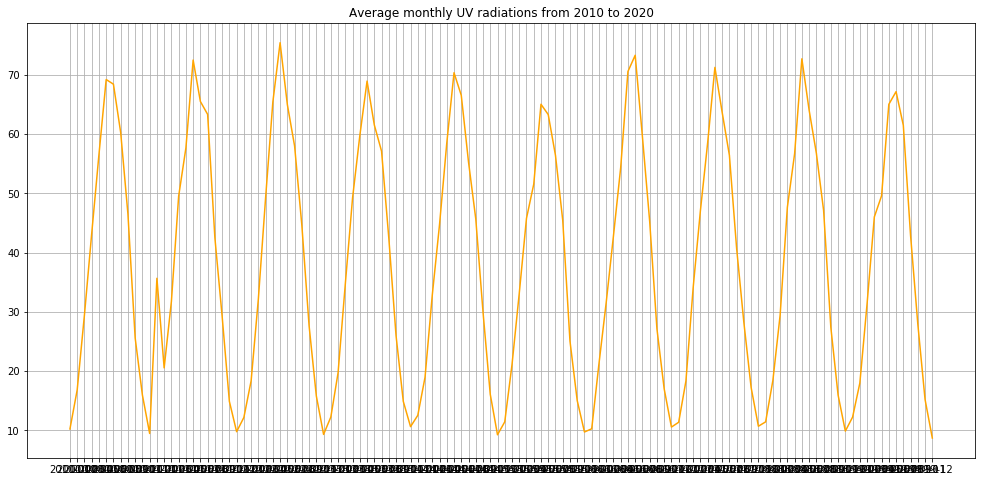

In [40]:
plt.figure(figsize=(17, 8))
plt.plot(climate_data.index,climate_data['UV radiation'],color='orange')
plt.title('Average monthly UV radiations from 2010 to 2020')
plt.grid(True)


In [23]:
climate_data3=climate_data2[['Solar Radiation']].copy()

### Plotting the Solar Radiation

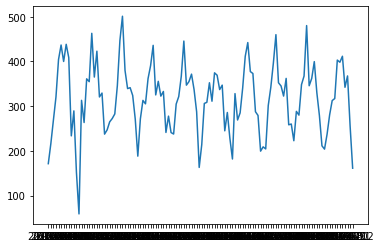

In [24]:
plt.plot(climate_data3)

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


### Feeding Multiple Features at a time to the Neural Network

In [26]:
climate_data4=climate_data2[['Solar Radiation','UV radiation','Highest Infrared radiation','N2O level']].copy()
len(climate_data4)

120

In [309]:
climate_data4=climate_data4.dropna()
climate_data4.tail(5)

,Solar Radiation,UV radiation,Highest Infrared radiation,N2O level
Date,,,,
2019-08,411.59,61.49,531.08,331.72
2019-09,342.24,42.89,482.35,331.84
2019-10,367.58,27.95,413.16,332.03
2019-11,256.04,15.22,374.80,332.38
2019-12,161.34,8.71,338.70,332.55


***Implementation of LSTM***

In [310]:
climate_data4.index=pd.to_datetime(climate_data4.index)
train,test=climate_data4[:-12],climate_data4[-12:]

scaler= MinMaxScaler()
scaler.fit(train)
train=scaler.transform(train)

n_input=12
n_features=4
generator=TimeseriesGenerator(train,train, length=n_input, batch_size=10)

model=Sequential()
model.add(LSTM(50,activation='relu',input_shape=(n_input,n_features)))
model.add(Dropout(0.2))
model.add(Dense(4))
model.compile(optimizer='adam',loss='mse')

model.fit_generator(generator, epochs=100)



Epoch 1/100
10/10 [==============================] - 1s 72ms/step - loss: 0.2763
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 0.1729
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0964
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0795
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0746
Epoch 6/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0767
Epoch 7/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0725
Epoch 8/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0665
Epoch 9/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0711
Epoch 10/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0571
Epoch 11/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0535
Epoch 12/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0535
Epoch 13/100
10/10 [================

In [311]:
prediction=[]
batch=train[-n_input:].reshape((1,n_input,n_features))

for i in range(n_input):
    prediction.append(model.predict(batch)[0])
    batch=np.append(batch[:,1:,:],[[prediction[i]]],axis=1)

In [312]:
prediction=pd.DataFrame(scaler.inverse_transform(prediction),index=climate_data4[-n_input:].index)

In [313]:
prediction

,0,1,2,3
Date,,,,
2019-01-01,258.512076,11.666215,344.736976,331.891781
2019-02-01,269.604635,19.780727,360.068472,331.899870
2019-03-01,303.488997,33.134722,394.022181,331.952669
2019-04-01,363.659928,49.396749,444.845167,332.140598
2019-05-01,409.717281,61.693680,490.601823,332.153190
2019-06-01,445.087847,71.772420,533.988680,331.937552
2019-07-01,440.671791,72.007773,551.131286,331.741499
2019-08-01,418.801846,65.695164,543.987925,331.550306
2019-09-01,370.144286,48.896858,498.486747,331.408897


In [314]:
df1=pd.concat([climate_data4,prediction],axis=1)
df1.tail(13)
#len(df1)

,Solar Radiation,UV radiation,Highest Infrared radiation,N2O level,0,1,2,3
Date,,,,,,,,
2018-12-01,211.34,9.88,347.65,331.95,NaN,NaN,NaN,NaN
2019-01-01,203.97,12.24,349.13,332.20,258.512076,11.666215,344.736976,331.891781
2019-02-01,237.35,17.98,345.80,332.45,269.604635,19.780727,360.068472,331.899870
2019-03-01,280.64,31.39,387.36,332.46,303.488997,33.134722,394.022181,331.952669
2019-04-01,312.52,46.03,438.12,332.48,363.659928,49.396749,444.845167,332.140598
2019-05-01,317.06,49.59,441.10,332.47,409.717281,61.693680,490.601823,332.153190
2019-06-01,403.00,65.03,519.43,332.23,445.087847,71.772420,533.988680,331.937552
2019-07-01,398.23,67.17,537.31,332.01,440.671791,72.007773,551.131286,331.741499
2019-08-01,411.59,61.49,531.08,331.72,418.801846,65.695164,543.987925,331.550306


Text(0.5, 1.0, 'N20 Levels')

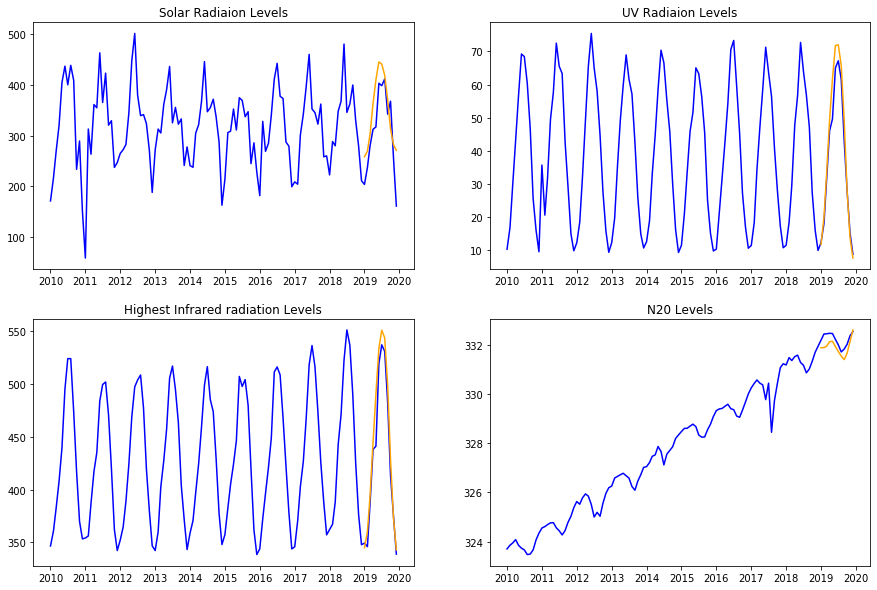

In [315]:

fig,axs=plt.subplots(2,2,figsize=(15,10))

axs[0,0].plot(df1['Solar Radiation'],color='blue')
axs[0,0].plot(df1[0],color='orange')
axs[0,0].set_title('Solar Radiaion Levels')

axs[0,1].plot(df1['UV radiation'],color='blue')
axs[0,1].plot(df1[1],color='orange')
axs[0,1].set_title('UV Radiaion Levels')

axs[1,0].plot(df1['Highest Infrared radiation'],color='blue')
axs[1,0].plot(df1[2],color='orange')
axs[1,0].set_title('Highest Infrared radiation Levels')

axs[1,1].plot(df1['N2O level'],color='blue')
axs[1,1].plot(df1[3],color='orange')
axs[1,1].set_title('N20 Levels')

***Now giving entire dataset as training data to predict the future***

In [316]:
train=climate_data4

scaler= MinMaxScaler()
scaler.fit(train)
train=scaler.transform(train)

n_input=12
n_features=4
generator=TimeseriesGenerator(train,train, length=n_input, batch_size=10)
model.fit_generator(generator, epochs=100)


Epoch 1/100
11/11 [==============================] - 0s 7ms/step - loss: 0.0098
Epoch 2/100
11/11 [==============================] - 0s 6ms/step - loss: 0.0082
Epoch 3/100
11/11 [==============================] - 0s 7ms/step - loss: 0.0089
Epoch 4/100
11/11 [==============================] - 0s 7ms/step - loss: 0.0088
Epoch 5/100
11/11 [==============================] - 0s 7ms/step - loss: 0.0121
Epoch 6/100
11/11 [==============================] - 0s 7ms/step - loss: 0.0103
Epoch 7/100
11/11 [==============================] - 0s 7ms/step - loss: 0.0082
Epoch 8/100
11/11 [==============================] - 0s 8ms/step - loss: 0.0089
Epoch 9/100
11/11 [==============================] - 0s 8ms/step - loss: 0.0107
Epoch 10/100
11/11 [==============================] - 0s 7ms/step - loss: 0.0094
Epoch 11/100
11/11 [==============================] - 0s 7ms/step - loss: 0.0094
Epoch 12/100
11/11 [==============================] - 0s 7ms/step - loss: 0.0090
Epoch 13/100
11/11 [=================

In [317]:
from pandas.tseries.offsets import DateOffset
add_dates=[climate_data4.index[-1] + DateOffset(months=x) for x in range(0,13)]
future_dates=pd.DataFrame(index=add_dates[1:],columns=climate_data4.columns)

In [318]:
prediction=[]
batch=train[-n_input:].reshape((1,n_input,n_features))

for i in range(n_input):
    prediction.append(model.predict(batch)[0])
    batch=np.append(batch[:,1:,:],[[prediction[i]]],axis=1)
    
prediction=pd.DataFrame(scaler.inverse_transform(prediction),index=future_dates[-n_input:].index)

In [319]:
final_df=pd.concat([climate_data4,prediction],axis=1)
len(final_df)

132

In [320]:
final_df.tail(13)

,Solar Radiation,UV radiation,Highest Infrared radiation,N2O level,0,1,2,3
2019-12-01,161.34,8.71,338.7,332.55,NaN,NaN,NaN,NaN
2020-01-01,NaN,NaN,NaN,NaN,222.873437,10.451160,338.080386,332.470627
2020-02-01,NaN,NaN,NaN,NaN,235.186602,16.421547,351.126494,332.371403
2020-03-01,NaN,NaN,NaN,NaN,268.436316,27.786576,383.093280,332.353284
2020-04-01,NaN,NaN,NaN,NaN,312.792825,39.837070,419.567798,332.445172
2020-05-01,NaN,NaN,NaN,NaN,344.670248,48.337428,449.885184,332.404938
2020-06-01,NaN,NaN,NaN,NaN,383.636688,60.193181,491.992610,332.097701
2020-07-01,NaN,NaN,NaN,NaN,391.828289,62.129805,511.593353,331.651460
2020-08-01,NaN,NaN,NaN,NaN,381.159888,57.915460,511.551656,331.406410
2020-09-01,NaN,NaN,NaN,NaN,345.051746,43.010475,473.525942,331.382383


### Plotting the future emissions

Text(0.5, 1.0, 'N20 Levels')

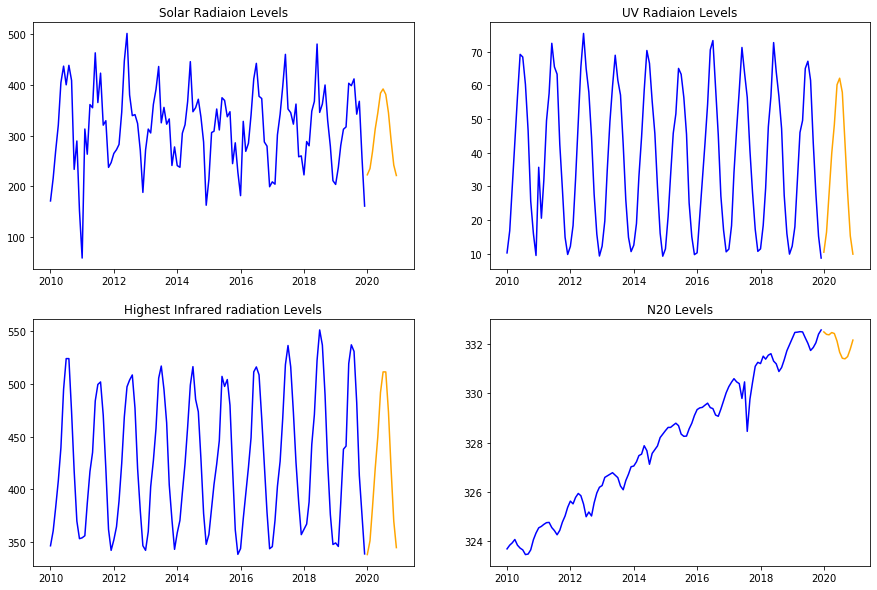

In [321]:

fig,axs=plt.subplots(2,2,figsize=(15,10))

axs[0,0].plot(final_df['Solar Radiation'],color='blue')
axs[0,0].plot(final_df[0],color='orange')
axs[0,0].set_title('Solar Radiaion Levels')

axs[0,1].plot(final_df['UV radiation'],color='blue')
axs[0,1].plot(final_df[1],color='orange')
axs[0,1].set_title('UV Radiaion Levels')

axs[1,0].plot(final_df['Highest Infrared radiation'],color='blue')
axs[1,0].plot(final_df[2],color='orange')
axs[1,0].set_title('Highest Infrared radiation Levels')

axs[1,1].plot(final_df['N2O level'],color='blue')
axs[1,1].plot(final_df[3],color='orange')
axs[1,1].set_title('N20 Levels')

In [322]:
future_radiations=pd.concat([climate_data4,prediction.rename(columns={0:'Solar Radiation',1:'UV radiation',2:'Highest Infrared radiation',3:'N2O level'})])
future_radiations.tail(13)

,Solar Radiation,UV radiation,Highest Infrared radiation,N2O level
2019-12-01,161.340000,8.710000,338.700000,332.550000
2020-01-01,222.873437,10.451160,338.080386,332.470627
2020-02-01,235.186602,16.421547,351.126494,332.371403
2020-03-01,268.436316,27.786576,383.093280,332.353284
2020-04-01,312.792825,39.837070,419.567798,332.445172
2020-05-01,344.670248,48.337428,449.885184,332.404938
2020-06-01,383.636688,60.193181,491.992610,332.097701
2020-07-01,391.828289,62.129805,511.593353,331.651460
2020-08-01,381.159888,57.915460,511.551656,331.406410
2020-09-01,345.051746,43.010475,473.525942,331.382383


In [323]:
air_temp=pd.DataFrame(climate_data['Air temperature'])
air_temp.index=pd.to_datetime(air_temp.index)
future_radiations1=pd.concat([future_radiations,air_temp],axis=1)

In [324]:
future_radiations1.head(14)

,Solar Radiation,UV radiation,Highest Infrared radiation,N2O level,Air temperature
2010-01-01,171.46,10.24,346.41,323.70,7.43
2010-02-01,216.36,16.83,360.59,323.85,8.83
2010-03-01,268.88,29.48,382.27,323.94,11.67
2010-04-01,320.56,43.18,408.13,324.08,14.50
2010-05-01,404.24,56.52,439.41,323.85,18.38
2010-06-01,436.70,69.21,495.04,323.73,27.64
2010-07-01,399.97,68.43,524.21,323.66,32.51
2010-08-01,438.29,60.29,524.21,323.47,32.51
2010-09-01,408.54,46.55,473.62,323.49,26.35
2010-10-01,233.63,25.60,417.23,323.66,18.38


### Now lets predict the future temperatures using the future emissions data

In [325]:
air_temp=pd.DataFrame(future_radiations1['Air temperature'])

***Tesitng on present data***

In [326]:
X_train,X_test, Y_train, Y_test=future_radiations[:-24],future_radiations[-24:-12],air_temp[:-24],air_temp[-24:-12]
scaler= MinMaxScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
scaler.fit(Y_train)
Y_train=scaler.transform(Y_train)
Y_test=scaler.transform(Y_test)

In [327]:
len(climate_data['Air temperature'])

120

In [328]:
len(air_temp[:-24])

108

## ANN-keras

In [331]:
#K.clear_session()
model = Sequential()
model.add(Dense(50, input_shape=(X_train.shape[1],), activation='relu', kernel_initializer='lecun_uniform'))
model.add(Dense(50, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
model.fit(X_train, Y_train, batch_size=6, epochs=100, verbose=1)

Epoch 1/100
108/108 [==============================] - 0s 2ms/step - loss: 0.3945
Epoch 2/100
108/108 [==============================] - 0s 175us/step - loss: 0.0305
Epoch 3/100
108/108 [==============================] - 0s 185us/step - loss: 0.0084
Epoch 4/100
108/108 [==============================] - 0s 175us/step - loss: 0.0055
Epoch 5/100
108/108 [==============================] - 0s 194us/step - loss: 0.0040
Epoch 6/100
108/108 [==============================] - 0s 218us/step - loss: 0.0035
Epoch 7/100
108/108 [==============================] - 0s 249us/step - loss: 0.0031
Epoch 8/100
108/108 [==============================] - 0s 240us/step - loss: 0.0029
Epoch 9/100
108/108 [==============================] - 0s 222us/step - loss: 0.0027
Epoch 10/100
108/108 [==============================] - 0s 194us/step - loss: 0.0025
Epoch 11/100
108/108 [==============================] - 0s 175us/step - loss: 0.0023
Epoch 12/100
108/108 [==============================] - 0s 185us/step - loss

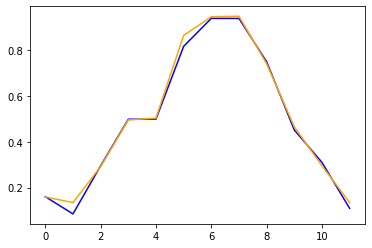

In [332]:
y_pred = model.predict(X_test)
plt.plot(Y_test,color='blue')
plt.plot(y_pred,color='orange')


### Predicting the future temperatures using future emissions data

In [333]:
X_train,X_test, Y_train, Y_test=future_radiations[:-12],future_radiations[-12:],air_temp[:-12],air_temp[-12:]
scaler= MinMaxScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
scaler.fit(Y_train)
Y_train=scaler.transform(Y_train)
Y_test=scaler.transform(Y_test)

In [334]:
model.fit(X_train, Y_train, batch_size=16, epochs=100, verbose=1)

Epoch 1/100
120/120 [==============================] - 0s 91us/step - loss: 3.3519e-04
Epoch 2/100
120/120 [==============================] - 0s 91us/step - loss: 2.8907e-04
Epoch 3/100
120/120 [==============================] - 0s 100us/step - loss: 2.7118e-04
Epoch 4/100
120/120 [==============================] - 0s 91us/step - loss: 2.7906e-04
Epoch 5/100
120/120 [==============================] - 0s 100us/step - loss: 2.8296e-04
Epoch 6/100
120/120 [==============================] - 0s 83us/step - loss: 2.7121e-04
Epoch 7/100
120/120 [==============================] - 0s 83us/step - loss: 2.4731e-04
Epoch 8/100
120/120 [==============================] - 0s 83us/step - loss: 2.3813e-04
Epoch 9/100
120/120 [==============================] - 0s 83us/step - loss: 2.4114e-04
Epoch 10/100
120/120 [==============================] - 0s 80us/step - loss: 2.4129e-04
Epoch 11/100
120/120 [==============================] - 0s 75us/step - loss: 2.3636e-04
Epoch 12/100
120/120 [=================

In [335]:
y_pred = model.predict(X_test)
Y_prediction=pd.DataFrame(scaler.inverse_transform(y_pred),index=future_radiations1[-12:].index)
y_train=pd.DataFrame(scaler.inverse_transform(Y_train),index=future_radiations1[:-12].index)

In [338]:
y_train

,0
2010-01-01,7.43
2010-02-01,8.83
2010-03-01,11.67
2010-04-01,14.50
2010-05-01,18.38
...,...
2019-08-01,30.90
2019-09-01,25.32
2019-10-01,16.54
2019-11-01,12.37


### Plotting the future temperatures

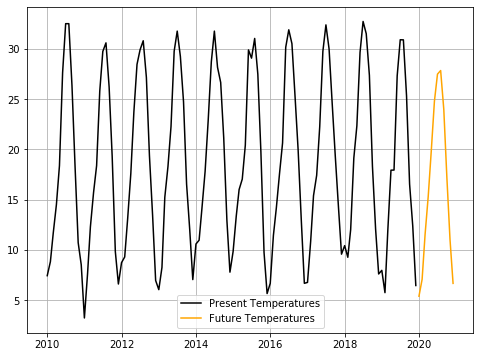

In [339]:
plt.figure(figsize=(8,6))
plt.plot(y_train,label = 'Present Temperatures',color='black')
plt.plot(Y_prediction,label='Future Temperatures',color='orange')
plt.legend(loc='best')
plt.grid(True)

***Ohhh! the temperatures of future got reduced***

### N2O level data for prediction

lets us predict the temperature only using N2O level and see whats the future temperature is

In [358]:
X_train,X_test, Y_train, Y_test=future_radiations[['N2O level']][:-12],future_radiations[['N2O level']][-12:],air_temp[:-12],air_temp[-12:]
scaler= MinMaxScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
scaler.fit(Y_train)
Y_train=scaler.transform(Y_train)
Y_test=scaler.transform(Y_test)

In [378]:
#K.clear_session()
model = Sequential()
model.add(Dense(50, input_shape=(X_train.shape[1],), activation='relu', kernel_initializer='lecun_uniform'))
model.add(Dense(50, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
model.fit(X_train, Y_train, batch_size=6, epochs=1000, verbose=1)

Epoch 1/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.1624
Epoch 2/1000
120/120 [==============================] - 0s 208us/step - loss: 0.1348
Epoch 3/1000
120/120 [==============================] - 0s 208us/step - loss: 0.1138
Epoch 4/1000
120/120 [==============================] - 0s 217us/step - loss: 0.1015
Epoch 5/1000
120/120 [==============================] - 0s 253us/step - loss: 0.0987
Epoch 6/1000
120/120 [==============================] - 0s 241us/step - loss: 0.0957
Epoch 7/1000
120/120 [==============================] - 0s 225us/step - loss: 0.0927
Epoch 8/1000
120/120 [==============================] - 0s 274us/step - loss: 0.0933
Epoch 9/1000
120/120 [==============================] - 0s 241us/step - loss: 0.0970
Epoch 10/1000
120/120 [==============================] - 0s 241us/step - loss: 0.0949
Epoch 11/1000
120/120 [==============================] - 0s 258us/step - loss: 0.0918
Epoch 12/1000
120/120 [==============================] - 0s 274us

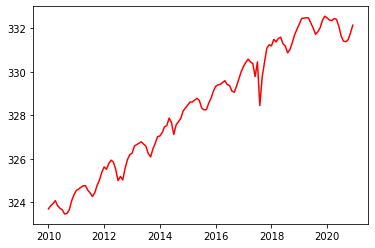

In [379]:
plt.plot(future_radiations['N2O level'],color='red')
#plt.plot(future_radiations1['Air temperature'],color='blue')

In [380]:
y_pred = model.predict(X_test)
Y_prediction=pd.DataFrame(scaler.inverse_transform(y_pred),index=future_radiations1[-12:].index)
y_train=pd.DataFrame(scaler.inverse_transform(Y_train),index=future_radiations1[:-12].index)

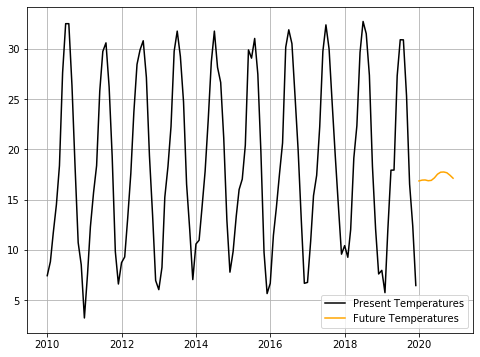

In [381]:
plt.figure(figsize=(8,6))
plt.plot(y_train,label = 'Present Temperatures',color='black')
plt.plot(Y_prediction,label='Future Temperatures',color='orange')
plt.legend(loc='best')
plt.grid(True)

### Boooom..... N20 level cannot predict the future temperatures 

So, lets compute the ***Correlation matrix*** and see what features are useful for prediction

In [383]:
future_radiations1.corr(method='pearson')

,Solar Radiation,UV radiation,Highest Infrared radiation,N2O level,Air temperature
Solar Radiation,1.000000,0.855894,0.831023,-0.072920,0.814343
UV radiation,0.855894,1.000000,0.935342,-0.093946,0.898168
Highest Infrared radiation,0.831023,0.935342,1.000000,-0.018045,0.988714
N2O level,-0.072920,-0.093946,-0.018045,1.000000,-0.038073
Air temperature,0.814343,0.898168,0.988714,-0.038073,1.000000


### Conclusion  

***Since N2O level not at all correlated our prediction is worse***    
***So lets try with Infrared radiation which has high correlation***

In [384]:
X_train,X_test, Y_train, Y_test=future_radiations[['Highest Infrared radiation']][:-12],future_radiations[['Highest Infrared radiation']][-12:],air_temp[:-12],air_temp[-12:]
scaler= MinMaxScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
scaler.fit(Y_train)
Y_train=scaler.transform(Y_train)
Y_test=scaler.transform(Y_test)
model.fit(X_train, Y_train, batch_size=6, epochs=1000, verbose=1)

Epoch 1/1000
120/120 [==============================] - 0s 166us/step - loss: 0.0632
Epoch 2/1000
120/120 [==============================] - 0s 158us/step - loss: 0.0127
Epoch 3/1000
120/120 [==============================] - 0s 158us/step - loss: 0.0031
Epoch 4/1000
120/120 [==============================] - 0s 166us/step - loss: 0.0028
Epoch 5/1000
120/120 [==============================] - 0s 158us/step - loss: 0.0023
Epoch 6/1000
120/120 [==============================] - 0s 176us/step - loss: 0.0022
Epoch 7/1000
120/120 [==============================] - 0s 199us/step - loss: 0.0020
Epoch 8/1000
120/120 [==============================] - 0s 175us/step - loss: 0.0019
Epoch 9/1000
120/120 [==============================] - 0s 175us/step - loss: 0.0020
Epoch 10/1000
120/120 [==============================] - 0s 174us/step - loss: 0.0020
Epoch 11/1000
120/120 [==============================] - 0s 158us/step - loss: 0.0019
Epoch 12/1000
120/120 [==============================] - 0s 158

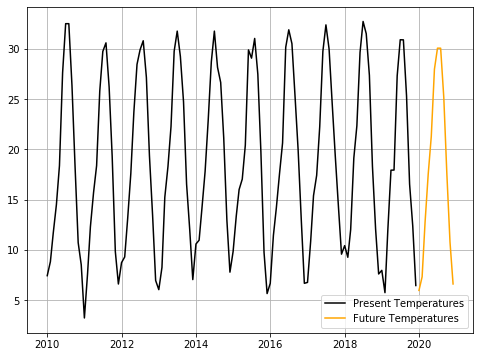

In [385]:
y_pred = model.predict(X_test)
Y_prediction=pd.DataFrame(scaler.inverse_transform(y_pred),index=future_radiations1[-12:].index)
y_train=pd.DataFrame(scaler.inverse_transform(Y_train),index=future_radiations1[:-12].index)

plt.figure(figsize=(8,6))
plt.plot(y_train,label = 'Present Temperatures',color='black')
plt.plot(Y_prediction,label='Future Temperatures',color='orange')
plt.legend(loc='best')
plt.grid(True)

***Perfect-Prediction***

***We can clearly see infrared radiation plays a major role in predicting future temperatures***